In [11]:
import sqlite3
from matplotlib import pyplot as plt
import numpy as np

from specDB import *


In [20]:
# make a query of 2022-06-06 to 2022-06-07
conn = sqlite3.connect('../eovsa.db')
c = conn.cursor()
stmp_start = datenum2stmp(mdates.date2num(datetime(2021,7,18,0,0,0)))
stmp_end = datenum2stmp(mdates.date2num(datetime(2022,7,18,0,0,0)))

c.execute("SELECT * FROM eovsa WHERE rowid % 100 = 0 AND stmp BETWEEN ? AND ?",
               (stmp_start, stmp_end))
result = c.fetchall()
c.close()

In [18]:
# convert result to stmp and data_arr

stmp = np.array([i[0] for i in result])
data_arr = np.array([i[1:] for i in result]).T

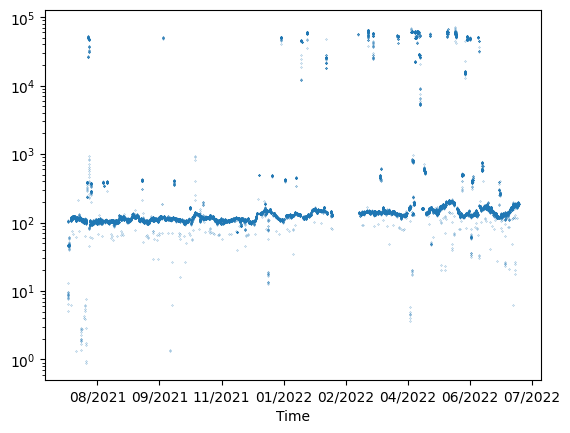

In [19]:
time_plt = [stmp2datenum(i) for i in stmp]


plt.plot(time_plt, data_arr[3,:],'.',ms=0.4)
plt.yscale('log')
plt.xlabel('Time')
# tick time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))